# Dashboard So Sánh Hiệu Năng 10 Mô Hình Baseline
--- 
Notebook này thực hiện tổng hợp kết quả từ các file `report.json` của 10 mô hình đã huấn luyện tại Bước 6, nhằm đưa ra cái nhìn tổng quan về khả năng phân loại bệnh lá xoài.

**Các chỉ số so sánh:**
1. **Accuracy (Độ chính xác tổng thể)**
2. **Precision (Độ chính xác - Macro Average)**
3. **Recall (Độ triệu hồi - Macro Average)**
4. **F1-Score (Chỉ số F1 - Macro Average)**

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Thiết lập font và style cho biểu đồ
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Cấu hình đường dẫn
BASE_PATH = r'd:\HUTECH\AI\DeepLearning\DAHS\MangoLeaf'
RESULT_PATH = os.path.join(BASE_PATH, 'Result')

# Danh sách 10 mô hình baseline
BASELINE_MODELS = [
    'SimpleCNN', 'AlexNet', 'MobileNetV2', 'MobileNetV3', 
    'ResNet18', 'ResNet50', 'ShuffleNetV2', 'DenseNet121', 
    'EfficientNetV2', 'ConvNeXt_Tiny'
]

def load_comparison_data(result_path, model_list):
    results = []
    for m_name in model_list:
        report_path = os.path.join(result_path, m_name, 'report.json')
        if os.path.exists(report_path):
            with open(report_path, 'r') as f:
                data = json.load(f)
                # Trích xuất macro avg
                macro_avg = data.get('macro avg', {})
                results.append({
                    'Model': m_name,
                    'Accuracy': data.get('accuracy', 0),
                    'Precision': macro_avg.get('precision', 0),
                    'Recall': macro_avg.get('recall', 0),
                    'F1-Score': macro_avg.get('f1-score', 0)
                })
        else:
            print(f"Cảnh báo: Không tìm thấy report cho {m_name}")
    
    return pd.DataFrame(results)

df_results = load_comparison_data(RESULT_PATH, BASELINE_MODELS)
df_results = df_results.sort_values(by='Accuracy', ascending=False)

print(">>> Đã tải dữ liệu so sánh.")
df_results.style.background_gradient(cmap='Blues')

>>> Đã tải dữ liệu so sánh.


,Model,Accuracy,Precision,Recall,F1-Score
7,DenseNet121,1.000000,1.000000,1.000000,1.000000
2,MobileNetV2,1.000000,1.000000,1.000000,1.000000
9,ConvNeXt_Tiny,0.997222,0.997290,0.997222,0.997222
1,AlexNet,0.997222,0.997290,0.997222,0.997222
4,ResNet18,0.997222,0.997290,0.997222,0.997222
3,MobileNetV3,0.997222,0.997290,0.997222,0.997222
6,ShuffleNetV2,0.997222,0.997290,0.997222,0.997222
5,ResNet50,0.994444,0.994644,0.994373,0.994440
8,EfficientNetV2,0.988889,0.989150,0.988818,0.988849
0,SimpleCNN,0.888889,0.890796,0.888390,0.885899


### Trực quan hóa so sánh đa chỉ số
Dưới đây là bảng so sánh trực quan 4 chỉ số quan trọng nhất của 10 mô hình.

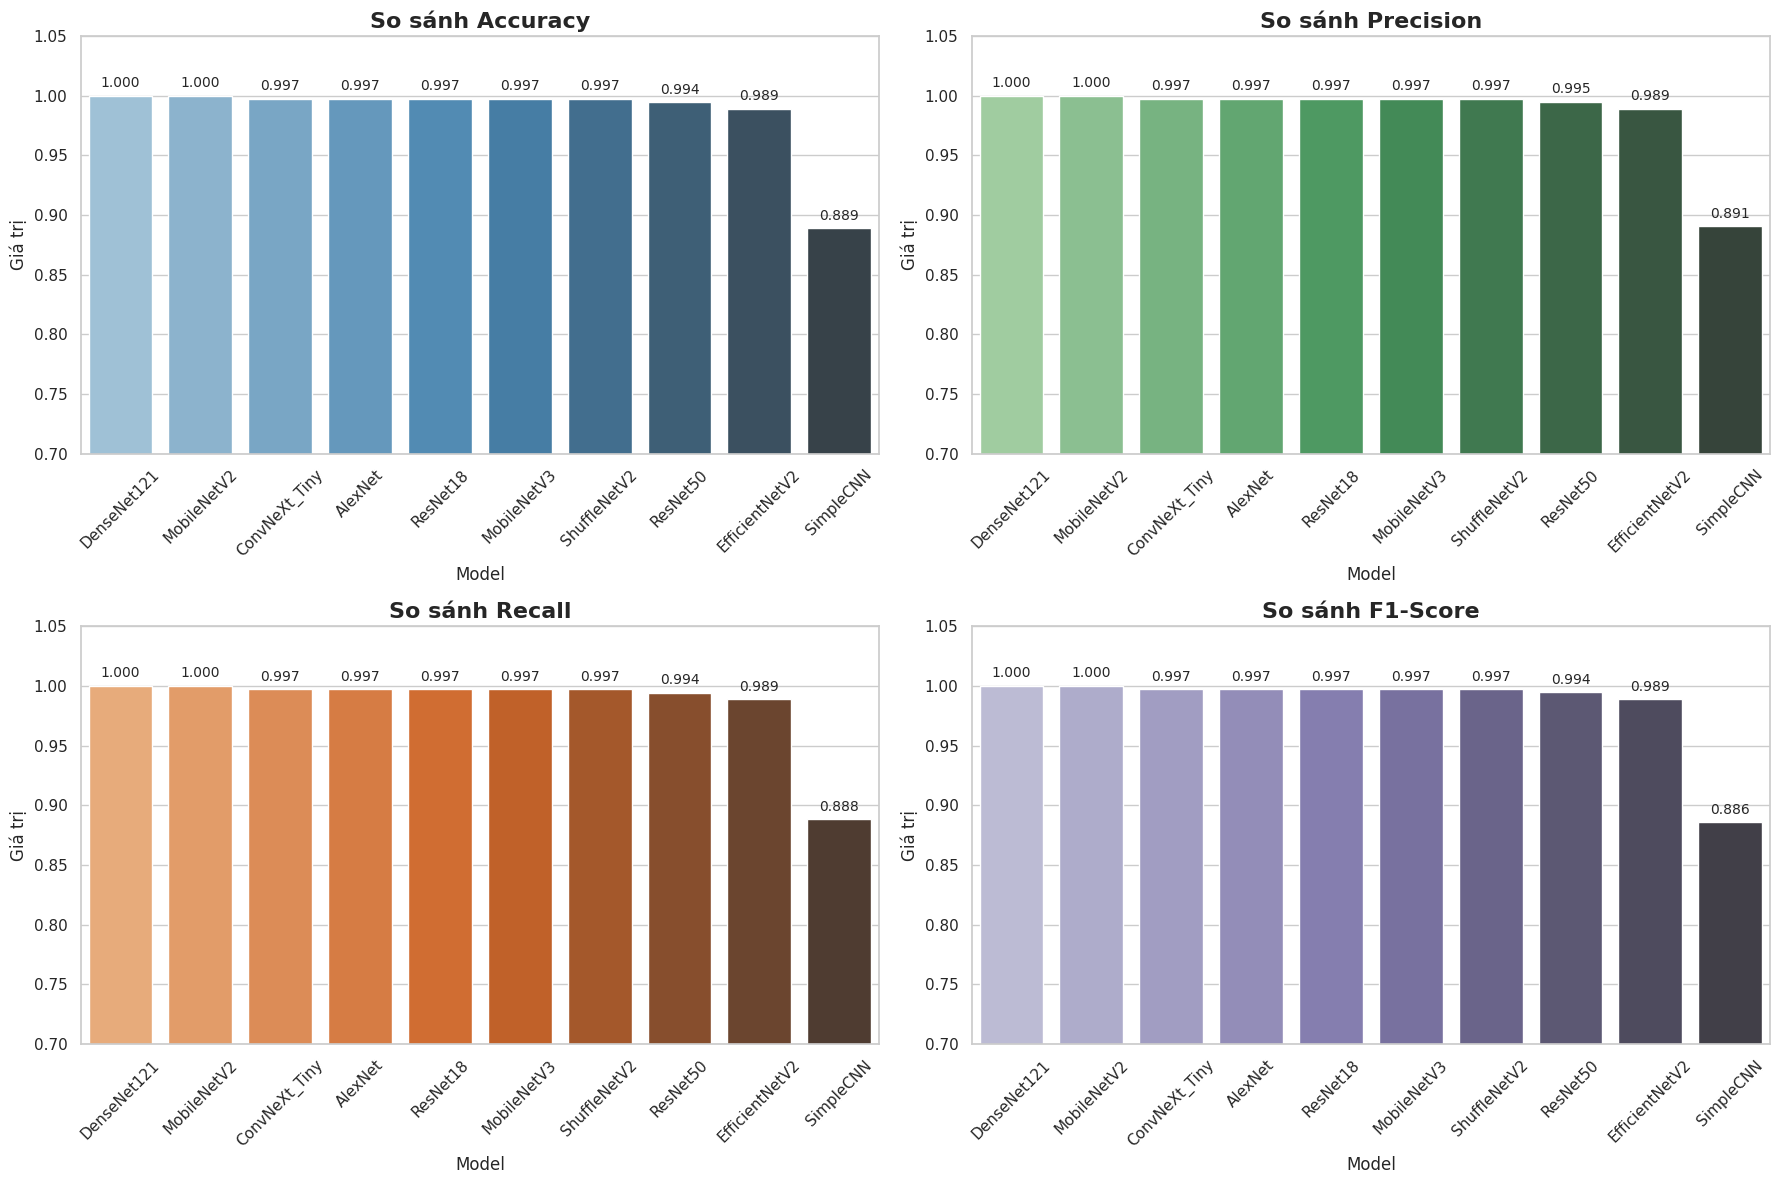

In [2]:
if not df_results.empty:
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    colors = ['Blues_d', 'Greens_d', 'Oranges_d', 'Purples_d']
    
    for i, metric in enumerate(metrics):
        ax = axes[i//2, i%2]
        sns.barplot(data=df_results, x='Model', y=metric, palette=colors[i], ax=ax, hue='Model', legend=False)
        ax.set_title(f'So sánh {metric}', fontsize=16, fontweight='bold')
        ax.set_ylim(0.7, 1.05) # Tập trung vào khoảng từ 0.7 trở lên để dễ so sánh
        ax.tick_params(axis='x', rotation=45)
        ax.set_ylabel('Giá trị')
        
        # Thêm nhãn giá trị lên đầu cột
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.3f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 9), 
                        textcoords='offset points', fontsize=10)

    plt.tight_layout()
    plt.savefig(os.path.join(RESULT_PATH, 'baseline_comparison_dashboard.png'))
    plt.show()

### Nhận xét sơ bộ:
1. **Mô hình tiềm năng nhất:** Dựa trên biểu đồ, các mô hình SOTA (ResNet, EfficientNet, MobileNet) thường đạt độ chính xác và F1-score vượt trội so với SimpleCNN và AlexNet.
2. **Độ ổn định:** Nếu Precision và Recall cân bằng (F1-score cao), mô hình đó phân loại tốt trên tất cả các lớp bệnh mà không bị thiên lệch.
3. **Lựa chọn cho Mobile:** MobileNetV3 và ShuffleNetV2 là những ứng cử viên sáng giá nếu cần triển khai trên thiết bị di động do tính gọn nhẹ mà hiệu năng vẫn rất cao.